# Battle of Neighborhoords of London

### Background :

<i>"London is the capital and largest city of England and the United Kingdom.The city stands on the River Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to the North Sea. London has been a major settlement for two millennia. Londinium was founded by the Romans. The City of London, London's ancient core and financial centre − an area of just 1.12 square miles (2.9 km2) and colloquially known as the Square Mile − retains boundaries that closely follow its medieval limits. The adjacent City of Westminster is an Inner London borough and has for centuries been the location of much of the national government. Thirty one additional boroughs north and south of the river also comprise modern London.London is one of the world's most important global cities. It exerts a considerable impact upon the arts, commerce, education, entertainment, fashion, finance, healthcare, media, professional services, research and development, tourism and transportation. It is one of the largest financial centres."</i>

### Problem:

The City is the financial capital of the country and is diverse in culture, as well as the city have many visitors every year. So, aim of the project is to analyze the interests of the people living in the city and determine the localities that are popular for some specific venue categories. Also, while many immigrants come and search for a house to live, we would look into what localities and neighboorhods differ from other.

### Interested Audience:

This city is very popular and have been experiencing increase in visitors overall over years. Those who are planning or interested in visiting the city might be interested what are good localities and local people interest overall.The interested audience in the project will be the visitors, tourists, and all the immigrants who are travelling to london to explore their area of interests.

### Data Sources:

For our analysis we will require data of neighborhoods of the city which I have taken from Wikipedia. We will require attributes such as name of neighborhoods, boroughs, postal codes of the neighborhoods. These all attributes are provided in the form of table in Wikipedia.Below is the link :
https://en.wikipedia.org/wiki/List_of_areas_of_London

Also, for the co-ordinates of various areas, we would import geopy.geocoders module.
For exploration of various venues and places , we would be scrape the information from foursquare website.

## DATA SECTION :

### Importing various Libraries that would be used for the project:

In [84]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


#### Lets first get some data about the areas of london from wikipedia:

In [85]:
london_neighborhoods=pd.read_excel(r'C:\Users\HP\Desktop\london1.xlsx')

In [86]:
london_neighborhoods.head()

,Location,London_borough,Post_town,Postcode_district,Dial_code,OS_grid_ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,20,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",20,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,20,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,20,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",20,TQ478728


In [87]:
london_neighborhoods.shape

(535, 6)

#### Data Cleansing :

In [88]:
#removing/dropping Dail code and OS grid ref

london_neighborhoods= london_neighborhoods.drop("Dial_code", axis=1)
london_neighborhoods = london_neighborhoods.drop("OS_grid_ref",axis=1)
london_neighborhoods.head()

,Location,London_borough,Post_town,Postcode_district
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4"
2,Addington,Croydon[8],CROYDON,CR0
3,Addiscombe,Croydon[8],CROYDON,CR0
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14"


In [89]:
# renaming columns 

cols=['Neighborhood','Borough','Town','Postcode']
london_neighborhoods.columns = cols

london_neighborhoods.head()

,Neighborhood,Borough,Town,Postcode
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4"
2,Addington,Croydon[8],CROYDON,CR0
3,Addiscombe,Croydon[8],CROYDON,CR0
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14"


In [90]:
#slicing Town just to London
london_neighborhoods = london_neighborhoods[london_neighborhoods.Town == "LONDON"]

# now since the whole "Town" column is from london we dont need that column for analysis
# dropping the Town column

london_neighborhoods = london_neighborhoods.drop("Town",axis=1)
london_neighborhoods.head()

,Neighborhood,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich [7]",SE2
1,Acton,"Ealing, Hammersmith and Fulham[8]","W3, W4"
6,Aldgate,City[10],EC3
7,Aldwych,Westminster[10],WC2
9,Anerley,Bromley[11],SE20


In [92]:

# checking if the postcode is unique for all teh rows
print("Normal Non Unique shape of dataframe : ",london_neighborhoods.Postcode.shape)

print("Unique shape of Postcodes in dataframe : ",london_neighborhoods.Postcode.unique().shape)

Normal Non Unique shape of dataframe :  (307,)
Unique shape of Postcodes in dataframe :  (161,)


##### Thus we have 161 unique Postal Codes for london and we could see 307 of them , thus grouping them.

In [93]:
london_neighborhoods = london_neighborhoods.groupby(['Postcode','Borough'])['Neighborhood'].apply(lambda x: ','.join(x.unique())).reset_index()
london_neighborhoods.head()

,Postcode,Borough,Neighborhood
0,"BR3, SE20",Bromley,Beckenham
1,"DA6, DA7, SE2",Bexley,Bexleyheath (also Bexley New Town)
2,E1,Tower Hamlets,"Mile End,Ratcliff,Shadwell,Spitalfields,Stepne..."
3,E10,Hackney,Lea Bridge
4,"E10, E15",Waltham Forest,Leyton


In [94]:
london_neighborhoods.shape

(192, 3)

#### We have 192 unique combinations of london Postcode and Borough. Now next thing is getting the neighborhood lattitude and longitude coordinates.

In [95]:
# defining the function for geopy library to get latitude and longitude for all the neighborhoods
import geocoder
def getNeighborhoodLatLong(Postcode,Borough,Neighborhoods):
    
    #Neighborhood with lat , long
    latlang = []
    # defining the user agent for geopy
    geolocator = Nominatim(user_agent="london_neighborhoods")
    
    # for every unique combination of Neighborhood and Borough get the lattitude and longitude
    for postcode, borough, neigh in zip(Postcode,Borough,Neighborhoods):
        address = str(postcode +"London, United Kingdom")
        location = geocoder.arcgis(address)
        latlang.append(
        location.latlng
        )
    
    return(latlang)

In [96]:
london_neigh = getNeighborhoodLatLong( Postcode = london_neighborhoods["Postcode"],
                                      Borough = london_neighborhoods["Borough"],
                                      Neighborhoods = london_neighborhoods["Neighborhood"]
)

In [97]:
london_neigh[:5]

[[51.415095000000065, -0.035402759999954014],
 [51.45349500000003, 0.151154760000054],
 [53.40838660500003, -1.9695595439999352],
 [53.40838660500003, -1.9695595439999352],
 [51.558850000000064, -0.00732999999996764]]

In [98]:
# we got the latitide and longitude for each of the postal code now lets merge it to our neighborhoods

# since our cordinates are combines lets split them into two lists of latitude and longitude.
latitude= []
longitude = []
for lat, lng in london_neigh:
    latitude.append(lat)
    longitude.append(lng)

print(latitude[0:5])
print(longitude[0:5])

[51.415095000000065, 51.45349500000003, 53.40838660500003, 53.40838660500003, 51.558850000000064]
[-0.035402759999954014, 0.151154760000054, -1.9695595439999352, -1.9695595439999352, -0.00732999999996764]


In [99]:
# now that we have got the latitude and logitude lists we can just put them in our dataframe.
london_neighborhoods["Latitude"] = latitude
london_neighborhoods["Longitude"] = longitude

london_neighborhoods.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,"BR3, SE20",Bromley,Beckenham,51.415095,-0.035403
1,"DA6, DA7, SE2",Bexley,Bexleyheath (also Bexley New Town),51.453495,0.151155
2,E1,Tower Hamlets,"Mile End,Ratcliff,Shadwell,Spitalfields,Stepne...",53.408387,-1.969560
3,E10,Hackney,Lea Bridge,53.408387,-1.969560
4,"E10, E15",Waltham Forest,Leyton,51.558850,-0.007330


In [100]:
# now we can plot the neighborhoods on map of london
# but before that we have to get the coordinates of london city! lets do that again using geocoder
address = 'London, United Kingdom'
geolocator=Nominatim(user_agent='london_neighborhoods')
location=geolocator.geocode(address)
lati=location.latitude
longi=location.longitude
print("The Co-ordinates of {} are : {}, {}".format(address,lati,longi))

The Co-ordinates of London, United Kingdom are : 51.5073219, -0.1276474


#### Map of London :

In [101]:
map_london=folium.Map(location=[lati,longi],zoom_start=13)
for lat,lng,borough,neighborhood in zip(london_neighborhoods['Latitude'],london_neighborhoods['Longitude'],london_neighborhoods['Borough'],london_neighborhoods['Neighborhood']):
    label='{},{}'.format(borough,neighborhood)
    folium.CircleMarker([lat,lng],color='red',popup=label,fill=True,fill_color='red',fill_opacity=0.6).add_to(map_london)
map_london    

#### Get the Neighborhood of London City from Foursquare 

In [31]:
CLIENT_ID = 'WXER4KXQTW0IHEGA0HLO2EMDOOWEZKAX4YFQLRDMZ2TSBRVM'  # your Foursquare ID
CLIENT_SECRET = '4NMKXNOKJBU4FR312SHLECHR1WSY0ONMQP2JXUYOZ0TWKTJG'  # your Foursquare Secret
VERSION = '20210118'  # Foursquare API version taking last month api for analysis

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WXER4KXQTW0IHEGA0HLO2EMDOOWEZKAX4YFQLRDMZ2TSBRVM
CLIENT_SECRET:4NMKXNOKJBU4FR312SHLECHR1WSY0ONMQP2JXUYOZ0TWKTJG


### Exploring Neighborhoods in London .

Lets get the top 100 venues in this area with their categories within 500m radius 

In [36]:
LIMIT = 100


def getNearbyVenues(names, latitudes, longitudes, radius=500):

    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([
            (name, lat, lng, v['venue']['name'], v['venue']['location']['lat'],
             v['venue']['location']['lng'],
             v['venue']['categories'][0]['name']) for v in results
        ])

    nearby_venues = pd.DataFrame(
        [item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [
        'Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
        'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'
    ]

    return (nearby_venues)

In [37]:
london_venues = getNearbyVenues(names=london_neighborhoods['Neighborhood'],
                                latitudes=london_neighborhoods['Latitude'],
                                longitudes=london_neighborhoods['Longitude'])

Beckenham
Bexleyheath (also Bexley New Town)
Mile End,Ratcliff,Shadwell,Spitalfields,Stepney,Wapping,Whitechapel
Lea Bridge
Leyton
Wanstead
Snaresbrook
Cann Hall,Leytonstone
Little Ilford,Manor Park
Plaistow
West Ham
Blackwall,Canary Wharf,Cubitt Town,Isle of Dogs,Leamouth,Limehouse,Millwall,Poplar
Maryland,Stratford
Canning Town,Custom House,North Woolwich,Silvertown
Upper Walthamstow,Walthamstow,Walthamstow Village
South Woodford
Haggerston
Bethnal Green,Cambridge Heath
Bow,Bromley (also Bromley-by-Bow),Old Ford
Chingford,Highams Park
Lower Clapton,Upper Clapton
Hackney
East Ham
Upton Park
Beckton
Forest Gate
Dalston,Hackney Central
Shacklewell
Hackney Marshes,Hackney Wick,Homerton,South Hackney
Clerkenwell,Finsbury,St Luke's
Farringdon
Barbican
Angel
Aldgate
Tower Hill
Blackfriars
Temple
Arkley
Kenton
Woodford Green
Woodford
Hoxton,Shoreditch
Barnsbury,Canonbury,De Beauvoir Town,Islington,Pentonville
Fortis Green
Muswell Hill
Brunswick Park,Friern Barnet,New Southgate
Colney Hatch
A

In [38]:
print(london_venues.shape)
london_venues.head()

(1602, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beckenham,51.415095,-0.035403,HSBC Sports And Social Club,51.417413,-0.036904,Athletics & Sports
1,Beckenham,51.415095,-0.035403,New Beckenham Railway Station (NBC),51.413734,-0.032354,Train Station
2,Beckenham,51.415095,-0.035403,Cator Park,51.413864,-0.040178,Park
3,Bexleyheath (also Bexley New Town),51.453495,0.151155,Zizzi,51.455929,0.150555,Italian Restaurant
4,Bexleyheath (also Bexley New Town),51.453495,0.151155,Prince Albert,51.455171,0.152965,Pub


#### Checking the size of london_venues we just got values for 52 unique neighborhoods insead of 192 neighborhoods 

In [39]:
london_neighborhoods["Neighborhood"].value_counts().count()

192

In [40]:
london_venues["Neighborhood"].value_counts().count()

52

In [41]:
london_neighborhoods = london_neighborhoods.loc[
    london_neighborhoods["Neighborhood"].isin(london_venues["Neighborhood"])]
london_neighborhoods["Neighborhood"].value_counts().count()

52

In [42]:
london_neighborhoods.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,"BR3, SE20",Bromley,Beckenham,51.415095,-0.035403
1,"DA6, DA7, SE2",Bexley,Bexleyheath (also Bexley New Town),51.453495,0.151155
4,"E10, E15",Waltham Forest,Leyton,51.558850,-0.007330
10,"E13, E15",Newham,West Ham,51.526530,0.028760
21,"E5, E8, E9, N1, N16",Hackney,Hackney,51.545050,-0.055320


#### Now for further analysis we just have those neighborhoods which we have some venue data.



#### Let's check how many venues were returned for each neighborhood 

In [43]:
london_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Acton,6,6,6,6,6,6
Angel,78,78,78,78,78,78
Arkley,4,4,4,4,4,4
Arnos Grove,8,8,8,8,8,8
Barbican,78,78,78,78,78,78
Barnet Gate,17,17,17,17,17,17
Beckenham,3,3,3,3,3,3
Beckton,27,27,27,27,27,27
Bexleyheath (also Bexley New Town),25,25,25,25,25,25


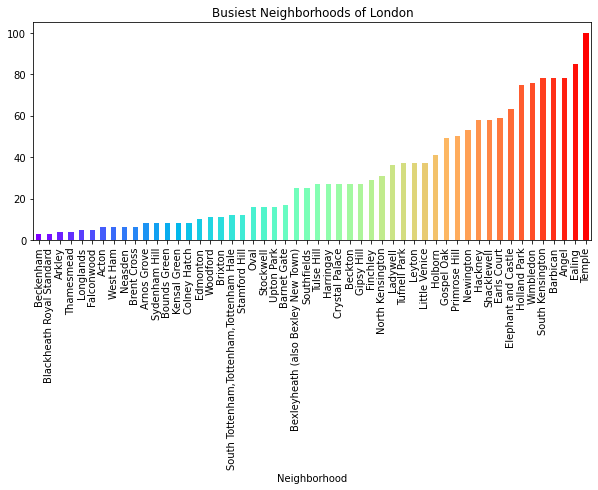

In [49]:
# getting the popular neighborhoods based on count of venues received from foursquare the most popular neighborhoods

pop_london_venues = london_venues.groupby('Neighborhood').count()

fig = plt.figure(figsize=(10,4))
colormap = cm.rainbow(np.linspace(0, 1, pop_london_venues.shape[0]))
plt.title("Busiest Neighborhoods of London")
ax = pop_london_venues["Venue Category"].sort_values().plot.bar(color = colormap)

In [50]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 220 uniques categories.


### Analyze Each Neighborhood using k-means clustering

#### For analysis using k means clustering we have to convert these venues categories into numerical form using dummies

In [51]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Neighborhood'] = london_venues['Neighborhood'] 

london_onehot.head()

,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Neighborhood
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Beckenham
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Beckenham
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Beckenham
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bexleyheath (also Bexley New Town)
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bexleyheath (also Bexley New Town)


In [52]:
london_onehot.shape


(1602, 221)

##### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [53]:
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped

,Neighborhood,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Acton,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Angel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.038462,0.0000,0.000000,0.012821,0.000000,0.000000,0.012821
2,Arkley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Arnos Grove,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Barbican,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.038462,0.0000,0.000000,0.012821,0.000000,0.000000,0.012821
5,Barnet Gate,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Beckenham,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,...,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Beckton,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,...,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Bexleyheath (also Bexley New Town),0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.040000,0.000000,0.0400,0.000000,0.000000,0.000000,0.000000,0.000000
9,Blackheath Royal Standard,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000


##### Let's print each neighborhood along with the top 5 most common venues

In [54]:
num_top_venues = 5

for hood in london_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acton----
               venue  freq
0      Grocery Store  0.33
1      Train Station  0.17
2  Indian Restaurant  0.17
3     Breakfast Spot  0.17
4               Park  0.17


----Angel----
         venue  freq
0   Food Truck  0.09
1  Coffee Shop  0.09
2          Pub  0.06
3         Park  0.05
4         Café  0.04


----Arkley----
                   venue  freq
0      Recruiting Agency  0.25
1                    Pub  0.25
2           Tennis Court  0.25
3            Coffee Shop  0.25
4  Performing Arts Venue  0.00


----Arnos Grove----
               venue  freq
0      Grocery Store  0.38
1      Train Station  0.12
2           Bus Stop  0.12
3  Fish & Chips Shop  0.12
4      Metro Station  0.12


----Barbican----
         venue  freq
0   Food Truck  0.09
1  Coffee Shop  0.09
2          Pub  0.06
3         Park  0.05
4         Café  0.04


----Barnet Gate----
                venue  freq
0       Grocery Store  0.12
1           Juice Bar  0.12
2  Italian Restaurant  0.06
3            Pla

                        venue  freq
0                     Daycare  0.25
1                Home Service  0.25
2           Convenience Store  0.25
3  Construction & Landscaping  0.25
4          African Restaurant  0.00


----Tufnell Park----
                  venue  freq
0                   Pub  0.11
1                  Café  0.08
2           Supermarket  0.05
3  Gym / Fitness Center  0.05
4        Soccer Stadium  0.05


----Tulse Hill----
           venue  freq
0           Café  0.15
1            Pub  0.11
2    Coffee Shop  0.07
3  Grocery Store  0.07
4    Pizza Place  0.07


----Upton Park----
                  venue  freq
0                   Pub  0.06
1          Home Service  0.06
2           Supermarket  0.06
3        Clothing Store  0.06
4  Fast Food Restaurant  0.06


----West Ham----
              venue  freq
0       Bus Station  0.33
1              Café  0.33
2               Pub  0.17
3               Gym  0.17
4  Ramen Restaurant  0.00


----Wimbledon----
              venue  freq


##### First, let's write a function to sort the venues in descending order.

In [55]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [56]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']


for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acton,Grocery Store,Park,Indian Restaurant,Breakfast Spot,Train Station,Escape Room,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant
1,Angel,Coffee Shop,Food Truck,Pub,Park,Vietnamese Restaurant,Café,Gym / Fitness Center,Italian Restaurant,Hotel,Beer Bar
2,Arkley,Recruiting Agency,Tennis Court,Coffee Shop,Pub,History Museum,Historic Site,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
3,Arnos Grove,Grocery Store,Bus Stop,Fish & Chips Shop,Metro Station,Beer Bar,Train Station,Yoga Studio,Ethiopian Restaurant,Flower Shop,Flea Market
4,Barbican,Coffee Shop,Food Truck,Pub,Park,Vietnamese Restaurant,Café,Gym / Fitness Center,Italian Restaurant,Hotel,Beer Bar


### Cluster Neighborhoods

###### Run k-means to cluster the neighborhood into 5 clusters.

In [57]:
# set number of clusters
kclusters = 5

london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 3, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
london_merged = london_neighborhoods

# merge london_grouped with london_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

london_merged.head() # check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"BR3, SE20",Bromley,Beckenham,51.415095,-0.035403,3,Train Station,Athletics & Sports,Park,Escape Room,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
1,"DA6, DA7, SE2",Bexley,Bexleyheath (also Bexley New Town),51.453495,0.151155,0,Pub,Chinese Restaurant,Supermarket,Clothing Store,Pharmacy,Furniture / Home Store,Coffee Shop,Shopping Mall,Fast Food Restaurant,Bakery
4,"E10, E15",Waltham Forest,Leyton,51.558850,-0.007330,0,Pub,Fried Chicken Joint,Platform,Coffee Shop,Clothing Store,Café,Fast Food Restaurant,Pharmacy,Gym / Fitness Center,Grocery Store
10,"E13, E15",Newham,West Ham,51.526530,0.028760,0,Bus Station,Café,Pub,Gym,Yoga Studio,Escape Room,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
21,"E5, E8, E9, N1, N16",Hackney,Hackney,51.545050,-0.055320,0,Pub,Coffee Shop,Brewery,Café,Bakery,Cocktail Bar,Vegetarian / Vegan Restaurant,Grocery Store,Organic Grocery,Modern European Restaurant


#### Plotting the Clusters

In [60]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10.3)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Neighborhood'], london_merged['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster + 1) + str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine London city Clusters

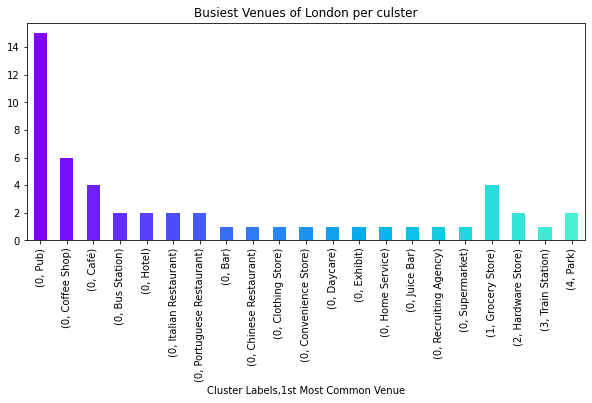

In [61]:
# Deciding names for clustering using barcharts
tmp = london_merged.groupby("Cluster Labels")["1st Most Common Venue"]
fig = plt.figure(figsize=(10,4))
colormap = cm.rainbow(np.linspace(0, 1, pop_london_venues.shape[0]))
plt.title("Busiest Venues of London per culster")
tmp.value_counts().plot.bar(color = colormap)

#### Cluster 1

just making a seprate data frames for each cluster which will help us in further analysis

In [62]:
clus1 = london_merged.loc[
    london_merged['Cluster Labels'] == 0,
    london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
clus1.head()

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bexley,0,Pub,Chinese Restaurant,Supermarket,Clothing Store,Pharmacy,Furniture / Home Store,Coffee Shop,Shopping Mall,Fast Food Restaurant,Bakery
4,Waltham Forest,0,Pub,Fried Chicken Joint,Platform,Coffee Shop,Clothing Store,Café,Fast Food Restaurant,Pharmacy,Gym / Fitness Center,Grocery Store
10,Newham,0,Bus Station,Café,Pub,Gym,Yoga Studio,Escape Room,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
21,Hackney,0,Pub,Coffee Shop,Brewery,Café,Bakery,Cocktail Bar,Vegetarian / Vegan Restaurant,Grocery Store,Organic Grocery,Modern European Restaurant
23,Newham,0,Home Service,Grocery Store,Sporting Goods Shop,Supermarket,Electronics Store,Clothing Store,Sandwich Place,Bakery,Park,Jewelry Store


In [63]:
# for popups in map assigning the lists
dft_tmp_clus1 = pd.DataFrame(
    clus1.groupby("Borough")["1st Most Common Venue"].apply(
        lambda x: ','.join(x.unique())).reset_index())
dft_tmp_clus1.rename(columns={
    'Borough': 'boroughs',
    '1st Most Common Venue': 'top_venues'
},
                     inplace=True)
dft_tmp_clus1["top_venues"].values

array(['Recruiting Agency,Supermarket,Juice Bar', 'Pub', 'Daycare',
       'Chinese Restaurant', 'Coffee Shop', 'Pub', 'Coffee Shop',
       'Italian Restaurant', 'Coffee Shop', 'Bus Station', 'Pub', 'Pub',
       'Pub,Hotel', 'Coffee Shop', 'Pub',
       'Hotel,Exhibit,Café,Italian Restaurant',
       'Coffee Shop,Café,Pub,Portuguese Restaurant', 'Convenience Store',
       'Pub', 'Bar', 'Bus Station,Home Service,Café', 'Clothing Store',
       'Pub', 'Pub', 'Café', 'Coffee Shop'], dtype=object)

#### We can see that this cluster is famous for pubs, Restaurants and cafe seems like totaly go out place.

#### Cluster 2

In [64]:
clus2 = london_merged.loc[
    london_merged['Cluster Labels'] == 1,
    london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
clus2.head()

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
46,Barnet,1,Grocery Store,Bus Stop,Fish & Chips Shop,Metro Station,Beer Bar,Train Station,Yoga Studio,Ethiopian Restaurant,Flower Shop,Flea Market
47,Enfield,1,Grocery Store,Bus Stop,Fish & Chips Shop,Metro Station,Beer Bar,Train Station,Yoga Studio,Ethiopian Restaurant,Flower Shop,Flea Market
48,Haringey,1,Grocery Store,Bus Stop,Fish & Chips Shop,Metro Station,Beer Bar,Train Station,Yoga Studio,Ethiopian Restaurant,Flower Shop,Flea Market
177,"Ealing, Hammersmith and Fulham",1,Grocery Store,Park,Indian Restaurant,Breakfast Spot,Train Station,Escape Room,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant


In [65]:
# for popups in map assigning the lists
dft_tmp_clus2 = pd.DataFrame(
    clus2.groupby("Borough")["1st Most Common Venue"].apply(
        lambda x: ','.join(x.unique())).reset_index())
dft_tmp_clus2.rename(columns={
    'Borough': 'boroughs',
    '1st Most Common Venue': 'top_venues'
},
                     inplace=True)
dft_tmp_clus2["top_venues"].values

array(['Grocery Store', 'Grocery Store', 'Grocery Store', 'Grocery Store'],
      dtype=object)

#### We can see this place is famous for Grocery stores

#### Cluster 3

In [66]:
clus3 = london_merged.loc[
    london_merged['Cluster Labels'] == 2,
    london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
clus3.head()

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
84,Brent,2,Hardware Store,Gym / Fitness Center,Music Store,Supermarket,Clothing Store,Convenience Store,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
85,Barnet,2,Hardware Store,Gym / Fitness Center,Music Store,Supermarket,Clothing Store,Convenience Store,Event Space,Exhibit,Fabric Shop,Falafel Restaurant


In [67]:
# for popups in map assigning the lists
dft_tmp_clus3 = pd.DataFrame(
    clus3.groupby("Borough")["1st Most Common Venue"].apply(
        lambda x: ','.join(x.unique())).reset_index())
dft_tmp_clus3.rename(columns={
    'Borough': 'boroughs',
    '1st Most Common Venue': 'top_venues'
},
                     inplace=True)
dft_tmp_clus3["top_venues"].values

array(['Hardware Store', 'Hardware Store'], dtype=object)

#### This cluster is all Hardware Stores

#### Cluster 4:

In [68]:
clus4 = london_merged.loc[
    london_merged['Cluster Labels'] == 3,
    london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
clus4.head()

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bromley,3,Train Station,Athletics & Sports,Park,Escape Room,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [69]:
# for popups in map assigning the lists
dft_tmp_clus4 = pd.DataFrame(
    clus4.groupby("Borough")["1st Most Common Venue"].apply(
        lambda x: ','.join(x.unique())).reset_index())
dft_tmp_clus4.rename(columns={
    'Borough': 'boroughs',
    '1st Most Common Venue': 'top_venues'
},
                     inplace=True)
dft_tmp_clus4["top_venues"].values

array(['Train Station'], dtype=object)

#### This cluser is more about the public transit

#### Cluster 5:

In [70]:
clus5 = london_merged.loc[
    london_merged['Cluster Labels'] == 4,
    london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
clus5.head()

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
139,Bexley,4,Park,Bus Stop,Historic Site,Construction & Landscaping,Golf Course,Yoga Studio,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
140,"Bexley, Greenwich",4,Park,Bus Stop,Historic Site,Construction & Landscaping,Golf Course,Yoga Studio,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [71]:
# for popups in map assigning the lists
dft_tmp_clus5 = pd.DataFrame(
    clus5.groupby("Borough")["1st Most Common Venue"].apply(
        lambda x: ','.join(x.unique())).reset_index())
dft_tmp_clus5.rename(columns={
    'Borough': 'boroughs',
    '1st Most Common Venue': 'top_venues'
},
                     inplace=True)
dft_tmp_clus5["top_venues"].values

array(['Park', 'Park'], dtype=object)

#### This cluster is famous for Parks.

In [72]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i * x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#folium.GeoJson(lon_json).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, top_spot, borough in zip(
        london_merged['Latitude'], london_merged['Longitude'],
        london_merged['Neighborhood'], london_merged['Cluster Labels'],
        london_merged['1st Most Common Venue'], london_merged['Borough']):
    # putting the extra options to explore in each cluster on the popups
    if cluster == 0:
        label = folium.Popup("<h6> <center> Bus Stations </center></h6> \
                             <h6><b> {}</b> : {}</h6> \
                          <h6> <b> {} </b> : {} </h6> ".format(
            str(poi), str(top_spot), str(borough),
            str(dft_tmp_clus1.loc[dft_tmp_clus1.boroughs == borough,
                                  "top_venues"].values)),
                             parse_html=False)
    elif cluster == 1:
        label = folium.Popup("<center>Pubs </center>\
                             <h6><b> {}</b> : {}</h6> \
                          <h6> <b> {} </b> : {} </h6> ".format(
            str(poi), str(top_spot), str(borough),
            str(dft_tmp_clus2.loc[dft_tmp_clus2.boroughs == borough,
                                  "top_venues"].values)),
                             parse_html=False)

    elif cluster == 2:
        label = folium.Popup("<h6> <center> Pubs </center> </h6> \
                             <h6><b> {}</b> : {}</h6> \
                          <h6> <b> {} </b> : {} </h6> ".format(
            str(poi), str(top_spot), str(borough),
            str(dft_tmp_clus3.loc[dft_tmp_clus3.boroughs == borough,
                                  "top_venues"].values)),
                             parse_html=False)

    elif cluster == 3:
        label = folium.Popup("<h6> <center> Grocery Stores </center> </h6> \
                             <h6><b> {}</b> : {}</h6> \
                          <h6> <b> {} </b> : {} </h6> ".format(
            str(poi), str(top_spot), str(borough),
            str(dft_tmp_clus4.loc[dft_tmp_clus4.boroughs == borough,
                                  "top_venues"].values)),
                             parse_html=False)

    elif cluster == 4:
        label = folium.Popup("<h6> <center>Super Market </center> </h6> \
                             <h6><b> {}</b> : {}</h6> \
                          <h6> <b> {} </b> : {} </h6> ".format(
            str(poi), str(top_spot), str(borough),
            str(dft_tmp_clus5.loc[dft_tmp_clus5.boroughs == borough,
                                  "top_venues"].values)),
                             parse_html=False)

    folium.CircleMarker([lat, lon],
                        radius=7,
                        popup=label,
                        color=rainbow[cluster - 1],
                        fill=True,
                        fill_color=rainbow[cluster - 1],
                        fill_opacity=0.7).add_to(map_clusters)

map_clusters

### Results of London Analysis

The following are the highlights of the 5 clusters above:

If someone is deciding to buy a house in London we can see the neighborhood clusters venues and based on venues decide where he should buy the house basically analysing the locality.

1.If the person is party animal he should go for cluster1.

2.If the person is not fan of outdoor eats then he needs groceries a lot and cluster 2 has popular grocerey stores.

3.If the person wants some hardware, cluster 3 has famous hardware stores.

4.If he has travelling as his prefrence then public transit is famous in cluster 4 area's.

5.If the person want to spend some time in Parks, then it is in found in Cluster 5.


## Discussion:

As I mentioned before, London is a big city with a high population density in a narrow area. The total number of measurements and population densities of the 33 districts in total can vary. As there is such a complexity, very different approaches can be tried in clustering and classification studies. Moreover, it is obvious that not every classification method can yield the same high quality results for this metropol.

I used the Kmeans algorithm as part of this clustering study. I set the optimum k value to 5. However, only 33 district coordinates were used. For more detailed and accurate guidance, the data set can be expanded and the details of the neighborhood or street can also be drilled.

I also performed data analysis through this information by adding the coordinates of districts as static data on GitHub. In future studies, these data can also be accessed dynamically from specific platforms or packages.

I ended the study by visualizing the data and clustering information on the London map. In future studies, web or telephone applications can be carried out to direct investors.

## Conclusion:

As a result, people are turning to big cities to start a business or work. For this reason, people can achieve better outcomes through their access to the platforms where such information is provided.

Not only for investors but also city managers can manage the city more regularly by using similar data analysis types or platforms.